<a href="https://www.kaggle.com/code/leekahwin/exam-score-visualisations-6-types?scriptVersionId=105418718" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="display:fill;
            border-radius:15px;
            background-color:greenyellow;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:black;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
 ✍️ Exam Score Visualizations 🖼️

This notebook will show 6 kinds of visualisation idioms, namely Donut Charts, Hat Graphs, Bar of Pie, Histogram, Violin and Box Plot. Hope this notebook can help you to uncover interesting findings of the math score raw data.

This notebook highligh **Hat Graph**. Data visualisation can be an effective method for presenting information and findings. A common style of graph and method for showing behavioural data is the bar graph. Since it was first developed in 1786, the format of the bar graph hasn't undergone much alteration. Here, a different chart type than the bar graph is recommended. The new structure, called a hat graph, retains some of the bar graph's crucial elements, such its discrete sections, but eliminates redundancies that cause issues when the baseline is not at zero. Hat graphs also include design elements that are based on Gestalt grouping theories and graph design concepts. The efficiency of the hat graph was examined in five empirical studies [1].

Notebook Author:<br>
Morris Lee 11/9/2022 

* [1.1 Import Packages and Define Useful Functions](#1.1)
* [1.2 Donut Charts](#1.2)
* [1.3 Hat Graphs](#1.3)
* [1.4 Bar of Pie](#1.4)
* [1.5 Histogram of Math](#1.5)
* [1.6 Violin and Box Plot](#1.6)


## <b>1.1 <span style='color:red'>|</span> Import Packages and Define Useful Functions </b> <a class="anchor" id="1.1"></a>


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Circle
import matplotlib
import seaborn as sns
plt.style.use('seaborn-bright')

def shape(df,df_name):
    print(f'STATUS: Dimension of "{df_name}" = {df.shape}')

def vc(df, column, r=False):
    vc_df = df.reset_index().groupby([column]).size().to_frame('count')
    vc_df['percentage (%)'] = vc_df['count'].div(sum(vc_df['count'])).mul(100)
    vc_df = vc_df.sort_values(by=['percentage (%)'], ascending=False)
    if r:
        return vc_df
    else:
        print(f'STATUS: Value counts of "{column}"...')
        display(vc_df)
def null(df,df_name):
    if df.isnull().values.any() ==False:
        print(f'STATUS: There is NO ANY null value in dataframe "{df_name}"')
    else:
        print(f'STATUS: There is null value in dataframe "{df_name}"')
        columns = df.columns[df.isna().any()].tolist()
        temp = {}
        for column in columns:
            temp[column] = df[column].count()
        print(f'STATUS: Nulls of {df_name} = {temp} of total {len(df)}')
df = pd.read_csv("/kaggle/input/analyzing-exam-scores/exams.csv")
shape(df,'df')
display(df.head())
null(df,'df')
vc(df, 'test_prep_course')

STATUS: Dimension of "df" = (1000, 6)


,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math
0,female,group B,bachelor's degree,standard,none,72
1,female,group C,some college,standard,completed,69
2,female,group B,master's degree,standard,none,90
3,male,group A,associate's degree,free/reduced,none,47
4,male,group C,some college,standard,none,76


STATUS: There is NO ANY null value in dataframe "df"
STATUS: Value counts of "test_prep_course"...


,count,percentage (%)
test_prep_course,,
none,642,64.2
completed,358,35.8


## <b>1.2 <span style='color:red'>|</span> Donut Charts </b> <a class="anchor" id="1.2"></a>


The size of each donut represents the proportion of each category in donut charts, which are used to display the proportions of categorical data. A count of features, number, rate/ratio, and string field are used to produce a doughnut chart.

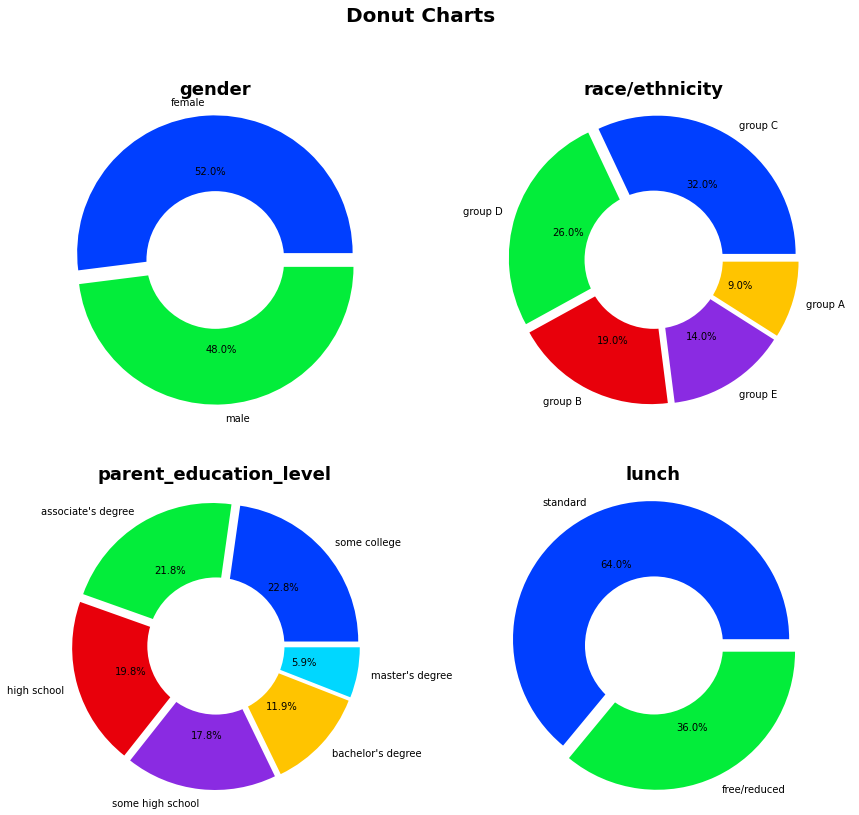

In [2]:
def pie(df, column):

    fig, axs = plt.subplots(nrows = 2, ncols = 2)
    fig = matplotlib.pyplot.gcf()
    fig.subplots_adjust(wspace=0.1)
    fig.set_size_inches(15, 13)
    fig.suptitle(f"Donut Charts", fontsize=20,fontweight='bold')
    
    counter = 0
    for i in range(2):
        for j in range(2):
            target = column[counter]
            # Pie chart, where the slices will be ordered and plotted counter-clockwise:
            labels = df[target].value_counts().index.tolist()
            sizes = np.rint(df[target].value_counts().values/ df[target].value_counts().values.sum() *100)
            explode = tuple(np.zeros(len(labels))+0.1)

            axs[i,j].pie(sizes, labels=labels, autopct='%1.1f%%', radius=2, explode = explode)
            axs[i,j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            axs[i,j].set_title(f'{target}', fontsize=18, fontname="Arial",fontweight='bold')

            #draw circle
            centre_circle = Circle((0,0),1,fc='white')
            axs[i,j].add_patch(centre_circle)
            
            counter+=1

    return plt.show()

pie(df, ['gender','race/ethnicity','parent_education_level','lunch'])

## <b>1.3 <span style='color:red'>|</span> Hat Graphs </b> <a class="anchor" id="1.3"></a>


Graphing data can be a useful tool for communicating data and findings. The bar graph is a typical type of graph and method for displaying behavioural data. Little has changed in the format of the bar graph since it was first created in 1786. Here, an alternative to the bar graph is suggested. The new format, known as a hat graph, keeps some of the essential components of the bar graph, such its discrete pieces, but does away with redundancies that become troublesome when the baseline is not at zero. Additionally, hat graphs have design components based on Gestalt grouping ideas and graph design principles. Five empirical research looked at the hat graph's effectiveness. [1]

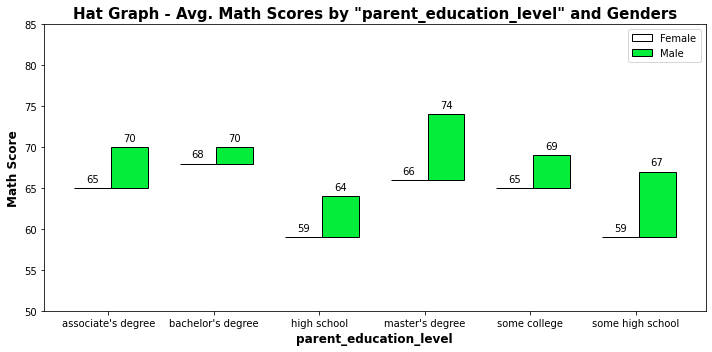

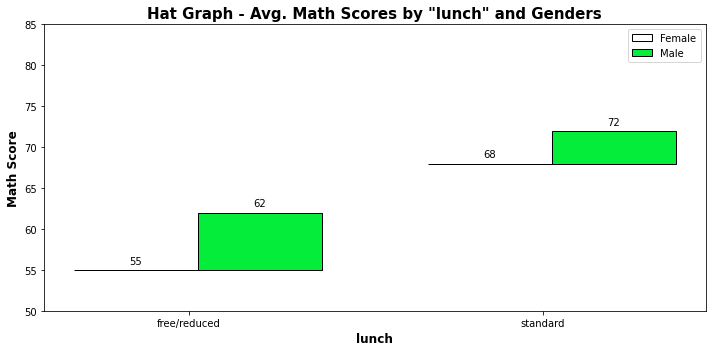

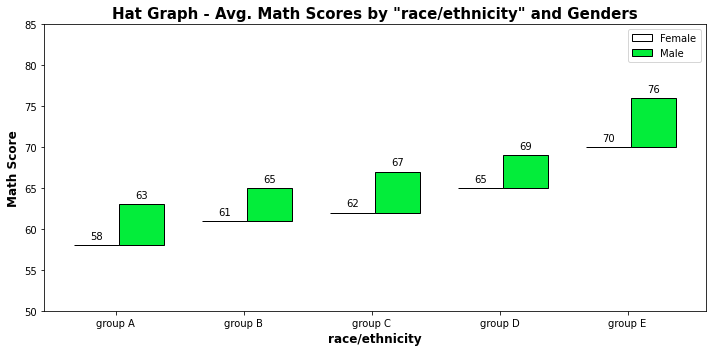

In [3]:
def hat_graph(ax, xlabels, values, group_labels):
    """
    Create a hat graph.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes to plot into.
    xlabels : list of str
        The category names to be displayed on the x-axis.
    values : (M, N) array-like
        The data values.
        Rows are the groups (len(group_labels) == M).
        Columns are the categories (len(xlabels) == N).
    group_labels : list of str
        The group labels displayed in the legend.
    """

    def label_bars(heights, rects):
        """Attach a text label on top of each bar."""
        for height, rect in zip(heights, rects):
            ax.annotate(f'{height}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 4),  # 4 points vertical offset.
                        textcoords='offset points',
                        ha='center', va='bottom')

    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing = 0.3  # spacing between hat groups
    width = (1 - spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0,
                       width, bottom=heights0, label=group_label, **style)
        label_bars(heights, rects)


# initialise labels and a numpy array make sure you have
# N labels of N number of values in the array
filter_columns = ['parent_education_level', 'lunch', 'race/ethnicity']
for filter_column in filter_columns:
    xlabels = np.sort(df[filter_column].unique()).tolist()
    female = [] ; male = []
    for label in xlabels:
        df_female = df[df.gender == 'female']
        df_female_label = df_female[df_female[filter_column] == label]
        df_female_label_score = int(df_female_label['math'].mean())

        df_male = df[df.gender == 'male']
        df_male_label = df_male[df_male[filter_column] == label]
        df_male_label_score = int(df_male_label['math'].mean())

        female.append(df_female_label_score)
        male.append(df_male_label_score)

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    hat_graph(ax, xlabels, [female, male], ['Female', 'Male'])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel(f'{filter_column}',fontsize=12, fontname="Arial",fontweight='bold')
    ax.set_ylabel('Math Score',fontsize=12, fontname="Arial",fontweight='bold')
    ax.set_ylim(50, 85)
    ax.set_title(f'Hat Graph - Avg. Math Scores by "{filter_column}" and Genders', 
                 fontsize=15, fontname="Arial",fontweight='bold')
    ax.legend()
    fig.tight_layout()
    plt.show()

## <b>1.4 <span style='color:red'>|</span> Bar of Pie </b> <a class="anchor" id="1.4"></a>


Create a "bar of pie" chart in which the first slice of the pie is "exploded" into a bar chart with an additional breakdown of the features of that slice. The example shows how to add two ConnectionPatches to a figure with different axes sets in order to connect the subplot charts.

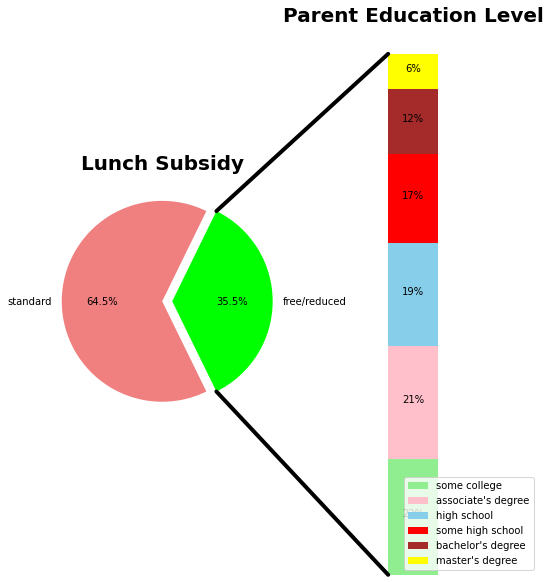

In [4]:
# make figure and assign axis objects

def pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, colors_list, color_bar,bar_title,pie_title):
    fig = plt.figure(figsize=(9, 10.0625))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    fig.subplots_adjust(wspace=0)

    # pie chart parameters
    ratios = ratios_pie
    labels = labels_pie
    explode = [0.1, 0]
    # rotate so that first wedge is split by the x-axis
    angle = -180 * ratios[0]
    ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
            labels=labels, explode=explode, colors = colors_list)
    ax1.set_title(pie_title, fontsize=20, fontname="Arial",fontweight='bold')
    # bar chart parameters
    xpos = 0
    bottom = 0
    ratios = ratios_bar
    width = .2
    colors = color_bar

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height() / 2
        bottom += height
        ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
                 ha='center')

    ax2.set_title(bar_title, fontsize=20, fontname="Arial",fontweight='bold')
    ax2.legend(labels_bar_tuple)
    ax2.axis('off')
    ax2.set_xlim(- 2.5 * width, 2.5 * width)

    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, bar_height), xyB=(x, y),
                          coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(- width / 2, 0), xyB=(x, y), coordsA="data",
                          coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    return plt.show()


labels_pie = df.lunch.value_counts(normalize=True).index.tolist()
ratios_pie = df.lunch.value_counts(normalize=True).tolist()

# TO REVERSE THE PIE CHART TO CORRECT POSITION
ratios_pie.insert(0, ratios_pie.pop(1))
labels_pie.insert(0, labels_pie.pop(1))

ratios_bar = df[df.lunch == 'free/reduced'].parent_education_level.value_counts(normalize=True).tolist()
labels_bar_tuple = tuple(df[df.lunch =='free/reduced'].parent_education_level.value_counts(normalize=True).index.tolist())
color_bar = ['lightgreen', 'pink','skyblue','red','brown','yellow']
color_pie = ['lime', 'lightcoral']
pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, color_pie, color_bar, "Parent Education Level",'Lunch Subsidy')

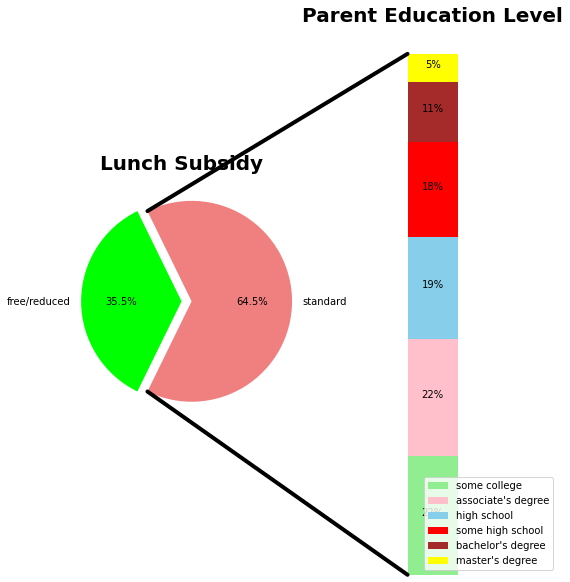

In [5]:
labels_pie = df.lunch.value_counts(normalize=True).index.tolist()
ratios_pie = df.lunch.value_counts(normalize=True).tolist()


ratios_bar = df[df.lunch == 'standard'].parent_education_level.value_counts(normalize=True).tolist()
labels_bar_tuple = tuple(df[df.lunch =='standard'].parent_education_level.value_counts(normalize=True).index.tolist())
color_bar = ['lightgreen', 'pink','skyblue','red','brown','yellow']
color_pie = ['lightcoral', 'lime']
pie_bar(ratios_pie, labels_pie, ratios_bar, labels_bar_tuple, color_pie, color_bar, "Parent Education Level",'Lunch Subsidy')

## <b>1.5 <span style='color:red'>|</span> Histogram of Math </b> <a class="anchor" id="1.5"></a>


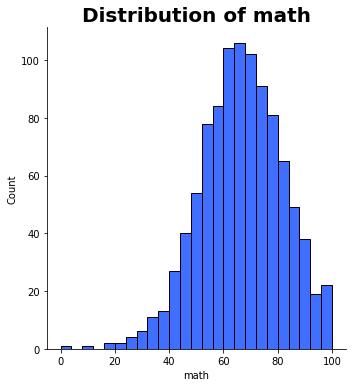

In [6]:
def vis_dist(df, col):
    variable = df[col].values
    ax = sns.displot(variable)
    plt.title(f'Distribution of {col}', fontsize=20, fontname="Arial",fontweight='bold')
    plt.xlabel(f'{col}')
    return plt.show()

vis_dist(df, 'math')

## <b>1.6 <span style='color:red'>|</span> Violin and Box Plot </b> <a class="anchor" id="1.6"></a>


An instructive violin plot is better to a straightforward box plot. The violin plot displays the complete distribution of the data, in contrast to a box plot, which simply displays summary statistics like mean, median, and interquartile ranges. When the data distribution is multimodal, the distinction is especially useful (more than one peak)

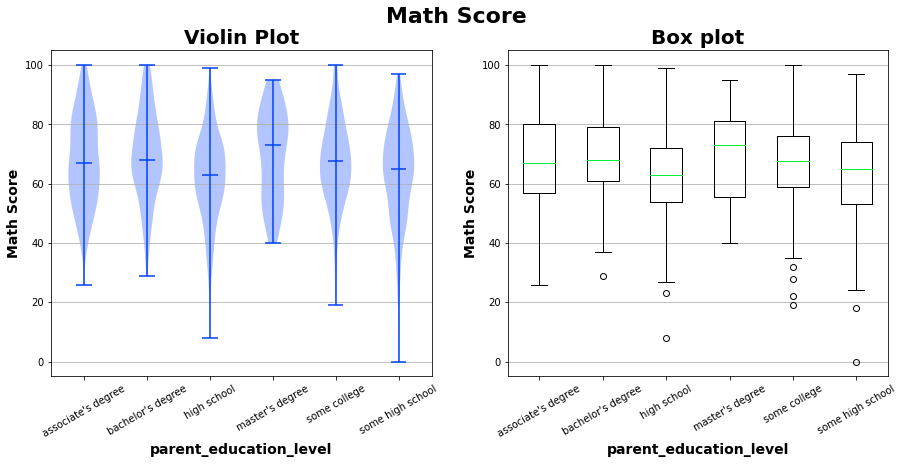

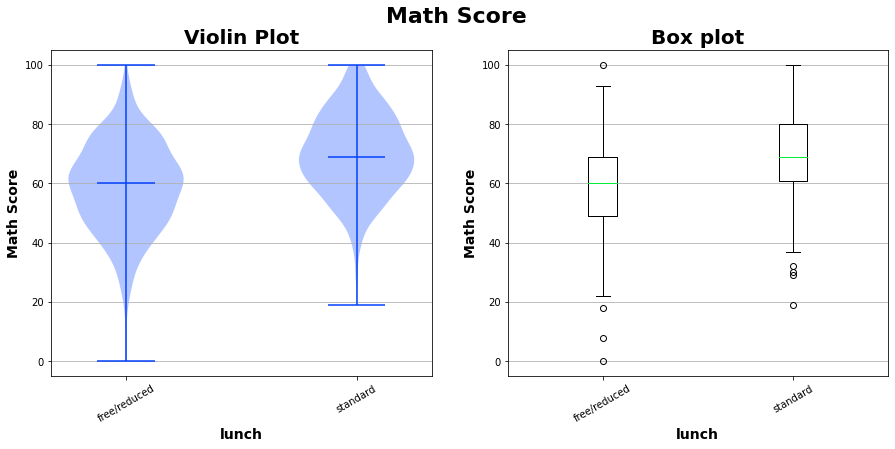

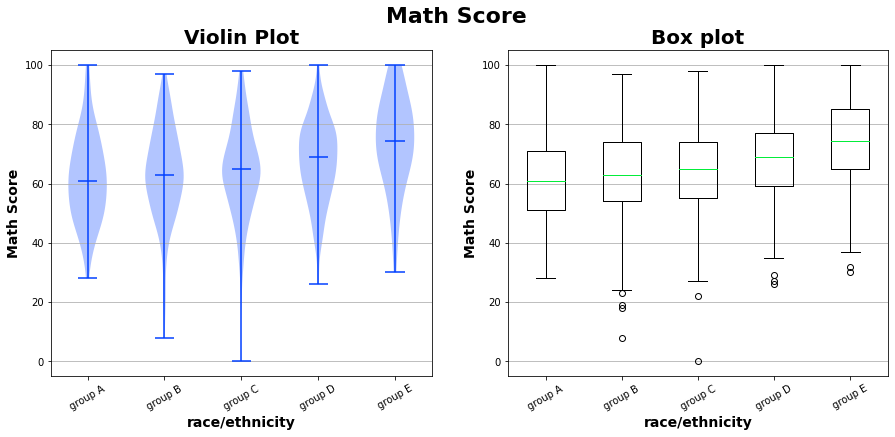

In [7]:
filter_columns = ['parent_education_level', 'lunch', 'race/ethnicity']

for filter_column in filter_columns:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    fig.suptitle(f"Math Score", fontsize=22,fontweight='bold')
    all_data = []
    parent_education_level_index = np.sort(df[filter_column].unique())
    for col in parent_education_level_index:
        temp = df[df[filter_column] == col]
        all_data.append(temp.math.values)

    # plot violin plot
    axs[0].violinplot(all_data,
                      showmeans=False,
                      showmedians=True)
    axs[0].set_title('Violin Plot', fontsize=20, fontname="Arial",fontweight='bold')

    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title('Box plot', fontsize=20, fontname="Arial",fontweight='bold')

    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=parent_education_level_index)
        ax.set_xlabel(filter_column, fontsize=14, fontname="Arial",fontweight='bold')
        ax.set_ylabel('Math Score', fontsize=14, fontname="Arial",fontweight='bold')
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    plt.show()

This notebook has show explicit coding to implement 6 kinds of visualisations. If you find this notebook useful, please upvote or let me know. Thank you.

Notebook Author:<br>
Morris Lee 11/9/2022 

References

[1] Witt, J.K. Introducing hat graphs. Cogn. Research 4, 31 (2019). https://doi.org/10.1186/s41235-019-0182-3